# The forecast of sales in an online computer game store.

## Description of the project.

We work at the online store "Streamchik" which sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (e.g. Xbox or PlayStation) are available from open sources. We need to identify patterns that determine the success of the games. This will allow us to make a bet on a potentially popular product and plan advertising campaigns.
We have data up to 2016. Let's assume it is now December 2016 and we are planning a campaign for 2017. We need to work out the principle of working with data. It doesn't matter if we are forecasting sales for 2017 based on 2016 data or 2027 based on 2026 data.
In the dataset, there is an abbreviation ESRB (Entertainment Software Rating Board) - this is an association that determines the age rating of computer games. ESRB evaluates game content and assigns it an appropriate age category, such as "For Adults", "For Younger Children" or "For Teens".

## Plan:

### 1. Reviewing of the data.

### 2. Preprocessing.
* Transform the data into the necessary types. Describe which columns had their data type changed and why;
* Process missing values, anomalies, and duplicates if necessary and describe the reasons that could have led to their appearance;
* Calculate the total sales in all regions and record them in a separate column.

### 3. EDA.
* Let's see how many games were released in different years. 
* Let's see how sales changed across platforms. We will select platforms with the highest total sales and plot the distribution by year. 
* Let's determine the current period and take data from it. 
* Let's select several potentially profitable platforms. 
* Let's plot a boxplot of global game sales by platform and describe the results. 
* Let's see how user and critic reviews affect sales within one popular platform. We will plot a scatter diagram and calculate the correlation between reviews and sales. 
* Let's compare the findings with game sales on other platforms. 
* Let's look at the overall distribution of games by genre.

### 4. User portrait. 
* For each region (NA, EU, JP), let's determine the following: 
  1. The most popular platforms (top-5). 
  2. The most popular genres (top-5). 
* Let's also determine the influence of the ESRB rating on sales in each region.

### 5. Testing hypotheses.
1. The average user ratings for the Xbox One and PC platforms are the same;
2. The average user ratings for the Action and Sports genres are different.

### 6. Overall conclusion.

## Description of the data:
Name - Game Name

Platform - Platform

Year_of_Release - Year of Release

Genre - Genre

NA_sales - Sales in North America (millions of copies sold)

EU_sales - Sales in Europe (millions of copies sold)

JP_sales - Sales in Japan (millions of copies sold)

Other_sales - Sales in other countries (millions of copies sold)

Critic_Score - Critic Score (maximum of 100)

User_Score - User Score (maximum of 10)

Rating - Rating from the Entertainment Software Rating Board (ESRB). This association determines the rating of computer games and assigns them an appropriate age category.

## 1. Reviewing of the data.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [97]:
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

In [98]:
url = 'https://code.s3.yandex.net/datasets/games.csv'
games = pd.read_csv(url)

In [99]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [100]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [101]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


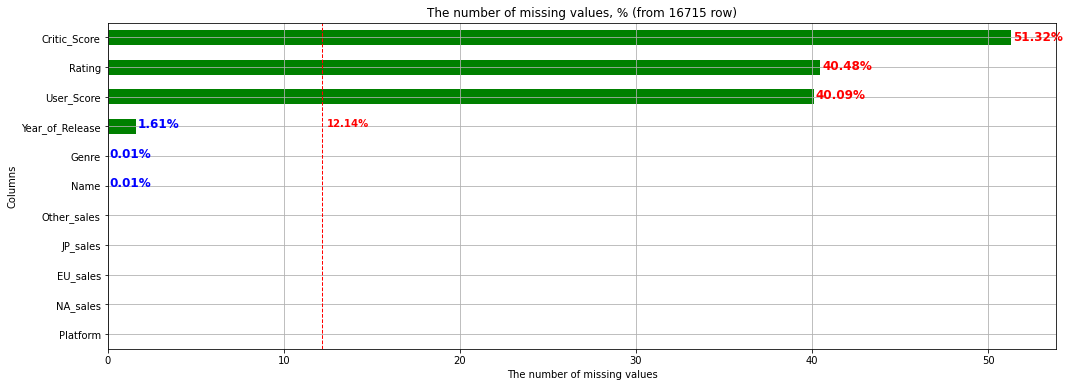

In [102]:
def percent_hbar(games, old_threshold=None):
    percent_of_nulls = (games.isnull().sum()/len(games)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', 
                               figsize=(17, 6), 
                               title='The number of missing values, % (from {} row)'.format(len(games)), 
                               color='green', 
                               legend=False)
    
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold')
        plt.axvline(x=threshold,linewidth=1, color='blue', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='blue', fontweight='bold')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold')
    ax.set_xlabel('')
    return ax, threshold

plot, threshold = percent_hbar(games)

plt.ylabel('Columns')
plt.xlabel('The number of missing values')
plt.grid(True)

In [103]:
print('The number of dublicates:', games.duplicated().sum())

The number of dublicates: 0


Let's look at possible errors and anomalies in categorical data.

In [104]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [105]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [106]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [107]:
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

We see a strange data type in the quantitative data in User_Score - object. This indicates that the column contains strings with the type str.

We see a rating system of 8 categories. The ESRB (Entertainment Software Rating Board) rating system includes 7 categories, the K-A rating does not belong to this system and corresponds to the E category.

In [108]:
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

We see data tbd. TBD is an abbreviation for To Be Determined or To Be Decided, which basically means the absence of data NaN.

From the preliminary review of the data, we see the following:
* The dataset is 16715 rows.
* There are symbols in uppercase in the column names.
* The data in the Year_of_Release column is in float format, it should be in int.
* Missing data in the columns: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating and on average missing data in 12.14% of the data. The missing data in the dataset appeared due to the absence of real data or data errors.
* Duplicates not detected.
* No errors or anomalies in categorical data detected.
* The data in the User_Score column is in object format and there are data tbd which are NaN.
* The Rating column contains the K-A category which does not belong to the ESRB system, K-A corresponds to the E category from the ESRB system.

Actions for identified anomalies, missing data and errors:
* Convert the column names to lowercase.
* Convert the data in the Year_of_Release column to int - the release year should be an integer value.
* Consider the missing data for each column separately and decide on the replacement or deletion of certain data.
* Replace the data in the User_Score column with tbd to NaN, then convert the data type of the column to float.
* In the Rating column, replace the K-A data with E.

## 2. Preprocessing.

We will convert the column names to lowercase.

In [109]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


We will replace the data with the abbreviation tbd to NaN and convert the data type of the column to float.

In [110]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN).astype(float)

 We will bring the data in the rating column to a unified rating system.

In [111]:
games['rating'] = games['rating'].replace('K-A', 'E')

We will fill in the missing data.

In [112]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [113]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


As we can see, the name and genre columns have missing data at the same time. We cannot fill in these missing data - we will delete these rows from the dataframe.

In [114]:
games = games.dropna(subset=['name'])
games.reset_index(drop=True).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Let'see other missing values.

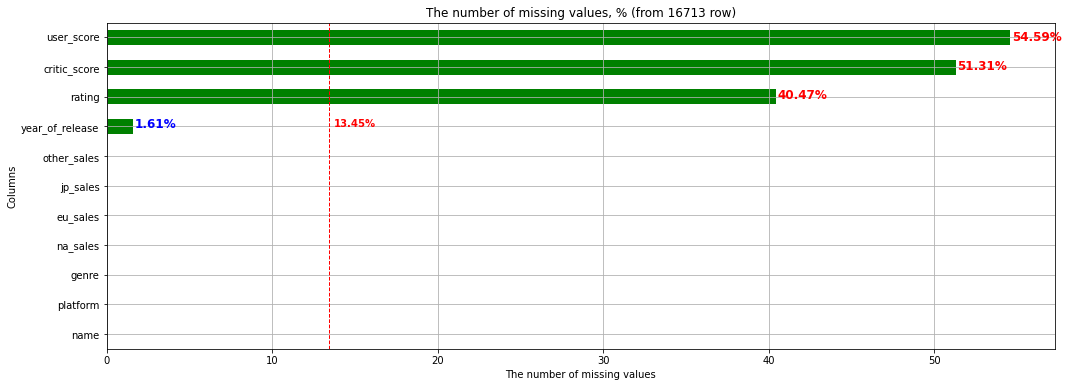

In [115]:
plot, threshold = percent_hbar(games)

plt.ylabel('Columns')
plt.xlabel('The number of missing values')
plt.grid(True)

In [116]:
temp = games.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': number NaN',temp[col_l].isna().sum(),
        ', % NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!']
name : number NaN 0 , % NaN 0.0 %
---------

As we can see, there are still missing values in the rating and year of release columns, most likely due to an error in parsing and the game data by name and platform could not be pulled. It would be wrong to fill in the missing values with the mean and median values as this would distort the analysis results. To enable adequate data analysis, we will replace the missing values with non-typical values of -1.

In [117]:
#games['year_of_release'] = games['year_of_release'].fillna(-1).astype(int)
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
games['rating'] = games['rating'].fillna('no rating')

Since the ESRB rating system is intended for the US and Canada, we will replace the missing values with non-typical values and for convenience in displaying these data, we will use 'no rating'.

Let's look at the number of missing values in the year_of_release column.

In [118]:
print('The number NaN в year_of_release', games['year_of_release'].isna().sum(),
        '% NaN в year_of_release:', round(games['year_of_release'].isna().sum()/len(games)*100, 2),'%')

The number NaN в year_of_release 269 % NaN в year_of_release: 1.61 %


As we can see, the percentage of missing values is less than 10%, also these missing values cannot be filled without additional manual processing or quality parsing from an external source, so we can sacrifice these data - we will delete the missing values.

In [119]:
games = games.dropna(subset=['year_of_release'])
games.reset_index(drop=True).head()
games['year_of_release'] = games['year_of_release'].astype(int)

<ipython-input-119-0792d8b99e80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['year_of_release'] = games['year_of_release'].astype(int)


I removed the placeholder for year_of_release and deleted the data with missing values from the dataframe, as these data cannot be filled and their total number is 1.61%.

In [120]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


We will calculate the total sales in all regions and write them to a separate column.

In [121]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<ipython-input-121-0efe37112a26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']


In [122]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.00,-1.00,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no rating,31.38


Conclusion: 

When preparing the data, the missing values in the name and genre columns were deleted. The missing values in the critic_score, user_score, and rating columns were replaced with non-typical values of -1. The data in the year_of_release and user_score columns were converted to int and float. The column names were converted to lowercase. Errors in the rating column have been corrected.

## 3. EDA.

### The number of games released by year.

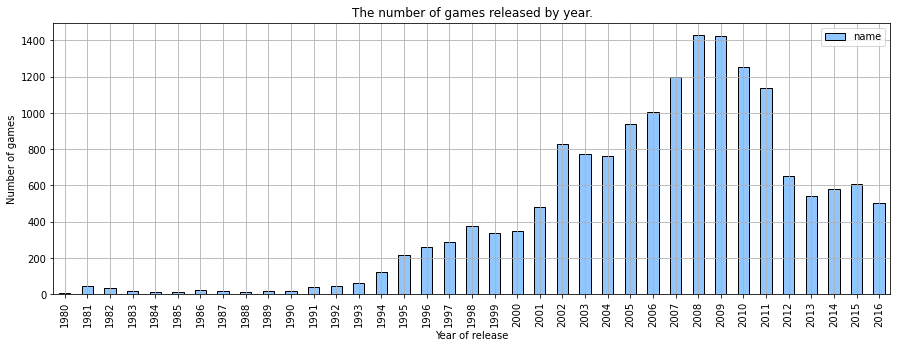

In [123]:
pivot_count_games_year = games.pivot_table(index='year_of_release', 
                                           values='name', 
                                           aggfunc='count')

plt.style.use('seaborn-pastel')
pivot_count_games_year.plot(kind='bar', 
                            ec='black',
                            figsize = (15,5))
plt.title('The number of games released by year.')
plt.ylabel('Number of games')
plt.xlabel('Year of release')
plt.grid(True)
plt.show()

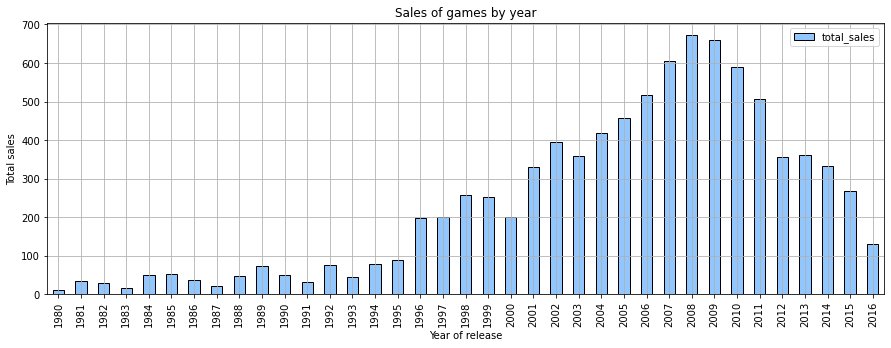

In [124]:
pivot_saled_games_year = games.pivot_table(index='year_of_release', 
                                           values='total_sales', 
                                           aggfunc='sum')

plt.style.use('seaborn-pastel')
pivot_saled_games_year.plot(kind='bar', 
                            ec='black',
                            figsize = (15,5))
plt.title('Sales of games by year')
plt.ylabel('Total sales')
plt.xlabel('Year of release')
plt.grid(True)
plt.show()

The number of games released by platform by year.

In [125]:
games.query('year_of_release >= 1993').pivot_table(index='platform', 
                                                   columns='year_of_release', 
                                                   values='name', 
                                                   aggfunc='count', 
                                                   fill_value='-')

year_of_release,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,
3DO,-,1.00,2.00,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3DS,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,116.00,93.00,91.00,80.00,86.00,46.00
DC,-,-,-,-,-,7.00,14.00,20.00,8.00,1.00,-,-,-,-,1.00,1.00,-,-,-,-,-,-,-,-
DS,-,-,-,-,-,-,-,-,-,-,-,23.00,118.00,201.00,376.00,492.00,403.00,323.00,153.00,23.00,8.00,-,-,-
GB,-,3.00,4.00,6.00,8.00,8.00,11.00,17.00,10.00,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GBA,-,-,-,-,-,-,-,1.00,107.00,198.00,150.00,175.00,135.00,39.00,6.00,-,-,-,-,-,-,-,-,-
GC,-,-,-,-,-,-,-,-,22.00,152.00,144.00,83.00,97.00,40.00,4.00,-,-,-,-,-,-,-,-,-
GEN,7.00,12.00,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
N64,-,-,-,18.00,49.00,77.00,102.00,60.00,9.00,1.00,-,-,-,-,-,-,-,-,-,-,-,-,-,-


Conclusion: 

From the graph, we can see that the number of games released before 1994 was very low. Starting from 1994, there was a gradual increase in the number of games released. This growth is associated with the development of electronics - the appearance of Pentium processors in 1993, the development of software - the release of Windows 3.1 in 1993 and the release of the first game console PlayStation in 1994. At the same time, in the period 1998-2000, we see that the gaming industry reaches a plateau with an increase in the number of games released from 2001, which is associated with the release of PlayStation 2 in 2000 and Xbox in 2000. The development of new gaming platforms allows to reach the peak of game releases by 2009 and, due to the development of mobile technologies Android, iOS + social networks, the number of released games is steadily decreasing from year to year and from 2012 to 2016 it reaches a plateau comparable to the volume of 2001. The graph of game sales shows a similar picture of active growth in sales from 1994-1995 to 2008, followed by a decrease in sales volumes.

### The number of games released by platform.

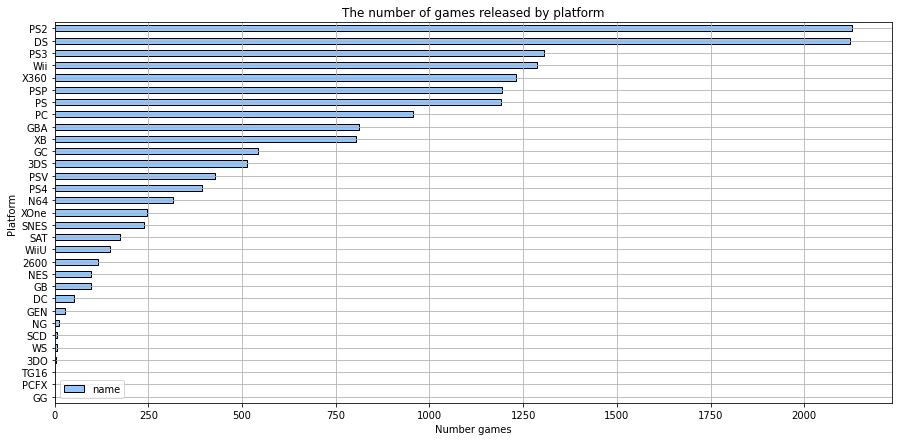

In [126]:
pivot_sum_games = games.pivot_table(index='platform', 
                                    values='name', 
                                    aggfunc='count'
                                    ).sort_values(by='name')

plt.style.use('seaborn-pastel')
pivot_sum_games.plot(kind='barh', 
                     ec='black',
                     figsize = (15,7))
plt.title('The number of games released by platform')
plt.ylabel('Platform')
plt.xlabel('Number games')
plt.grid(True)
plt.show()

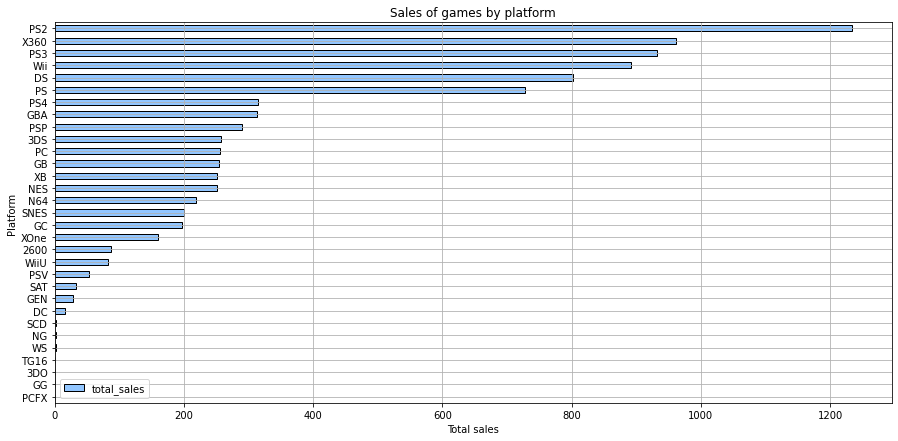

In [127]:
pivot_sum_games = games.pivot_table(index='platform', 
                                    values='total_sales', 
                                    aggfunc='sum'
                                    ).sort_values(by='total_sales')

plt.style.use('seaborn-pastel')
pivot_sum_games.plot(kind='barh', 
                     ec='black',
                     figsize = (15,7))
plt.title('Sales of games by platform')
plt.ylabel('Platform')
plt.xlabel('Total sales')
plt.grid(True)
plt.show()

Conclusion: we can see that the most popular platform over the past period in the data set is the well-known PlayStation 2, followed by X360, PS3, Wii, DS and PS, and in terms of the number of games released, the leaders are PS2 and DS, followed by PS3, Wii, X360, PSP, PS. The data on game sales, unlike the number of games released, indirectly shows us the popularity of a particular platform from a technical point of view, as well as the quality of the games released for it.

From the graphs it is seen that the most popular are 8 platforms.

By the number of released games.

In [128]:
top_8_released_platform = games.pivot_table(index='platform', 
                                            values='name', 
                                            aggfunc='count'
                                            ).sort_values(by='name', ascending=False).head(8)
top_8_released_platform

,name
platform,
PS2,2127
DS,2121
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957


By the number of games sold.

In [129]:
top_8_saled_platform = games.pivot_table(index='platform', 
                                         values='total_sales', 
                                         aggfunc='sum'
                                         ).sort_values(by='total_sales', ascending=False).head(8)
top_8_saled_platform

,total_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88


### Let's look at the life span of platforms, the emergence of new platforms and the departure of old ones.

From the graph it is seen that the greatest number of games sold is for 6 platforms.

In [130]:
top_6_saled_platform = games.pivot_table(index='platform', 
                                         values='total_sales', 
                                         aggfunc='sum'
                                         ).sort_values(by='total_sales', ascending=False).head(6)
top_6_saled_platform

,total_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


In [131]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

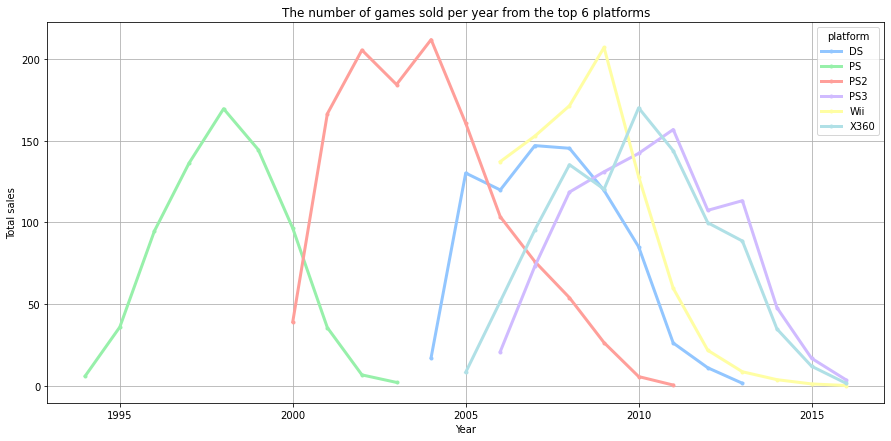

In [132]:
sales_by_platform = games.query('(year_of_release >= 1990) and (platform == @top_platforms)').pivot_table(index='year_of_release', 
                                                                                                          columns='platform', 
                                                                                                          values='total_sales', 
                                                                                                          aggfunc='sum')#.sort_values(by = 'platform', ascending=False).head(8)
plt.style.use('seaborn-pastel')
sales_by_platform.plot(style='.-', 
                       kind='line', 
                       fontsize=10, 
                       linewidth=3, 
                       figsize = (15,7))
plt.title('The number of games sold per year from the top 6 platforms')
plt.ylabel('Total sales')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [133]:
time_life=[]
for i in sales_by_platform.columns:
    lst=(sales_by_platform.index[~sales_by_platform[i].isnull()])
    life =lst.max()-lst.min()+1
    time_life.append(life)

time_life_1 = pd.Series(time_life)
print('Average life span of a platform, years:', time_life_1.median())

Average life span of a platform, years: 11.0


We see that the life span of a platform on average is 11 years, but progress is inexorable and we are confidently moving towards perfection. Let's look separately at the number of games released per year starting from 2005.

In [134]:
games.query('year_of_release >= 2005').pivot_table(index='platform', 
                                                   columns='year_of_release', 
                                                   values='name', 
                                                   aggfunc='count', 
                                                   fill_value='-')

year_of_release,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,
3DS,-,-,-,-,-,-,116.00,93.00,91.00,80.00,86.00,46.00
DC,-,-,1.00,1.00,-,-,-,-,-,-,-,-
DS,118.00,201.00,376.00,492.00,403.00,323.00,153.00,23.00,8.00,-,-,-
GBA,135.00,39.00,6.00,-,-,-,-,-,-,-,-,-
GC,97.00,40.00,4.00,-,-,-,-,-,-,-,-,-
PC,37.00,52.00,62.00,76.00,107.00,90.00,139.00,61.00,38.00,47.00,50.00,54.00
PS2,260.00,259.00,214.00,191.00,96.00,38.00,7.00,-,-,-,-,-
PS3,-,27.00,90.00,138.00,162.00,181.00,215.00,148.00,126.00,108.00,73.00,38.00
PS4,-,-,-,-,-,-,-,-,16.00,75.00,137.00,164.00


In [135]:
relev_games = games.query('year_of_release > 2012')

As we can see from the data, if for further analysis, and especially for forecasting in 2017, we select an average period of 11 years, then we will capture for analysis already expired platforms such as PS2, XB, GBA, GC. For the most effective further analysis, let us take the beginning of the period as the year of the release of games for the most popular platforms in the world, PS4, XOne - 2013. Thus, the period of data analysis for further forecasting in 2017 will be taken from 2013 to 2016 inclusive.

### We will build a distribution of sales by years in the current period 2013 - 2016.

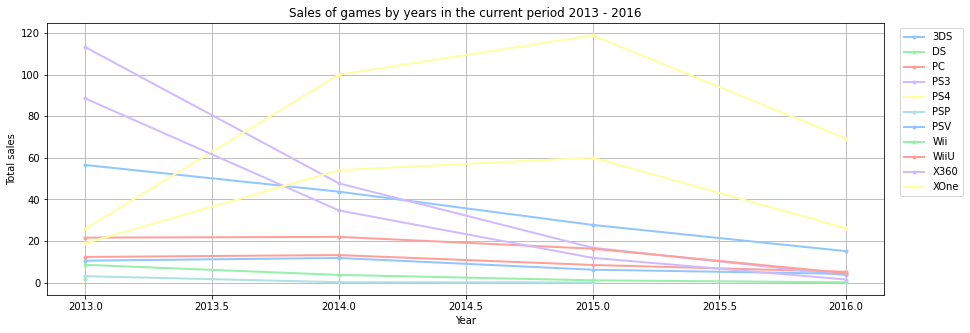

In [184]:
relev_saled_games = games.query('year_of_release >= 2013').pivot_table(index='year_of_release', 
                                                                       columns='platform', 
                                                                       values='total_sales', 
                                                                       aggfunc='sum')

plt.style.use('seaborn-pastel')
relev_saled_games.plot(style='.-', 
                       kind='line', 
                       fontsize=10, 
                       linewidth=2, 
                       figsize = (15,5))
plt.title('Sales of games by years in the current period 2013 - 2016')
plt.ylabel('Total sales')
plt.xlabel('Year')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

Let's build range diagrams for sales volume for each platform in the period 2013 - 2016.

Text(9.925000000000004, 0.5, 'Total sales')

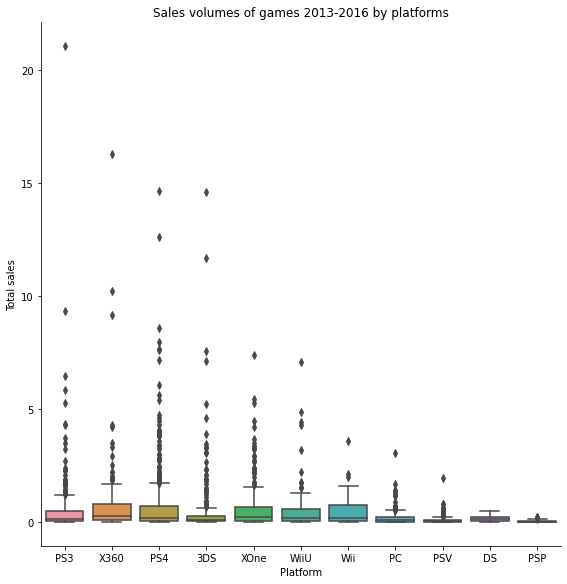

In [137]:
sns.catplot(x='platform', 
            y='total_sales', 
            kind='box', 
            data=relev_games, 
            orient='v', 
            height=8)
plt.title('Sales volumes of games 2013-2016 by platforms')
plt.xlabel('Platform')
plt.ylabel('Total sales')

Посмотрим поближе.

(0.0, 0.9)

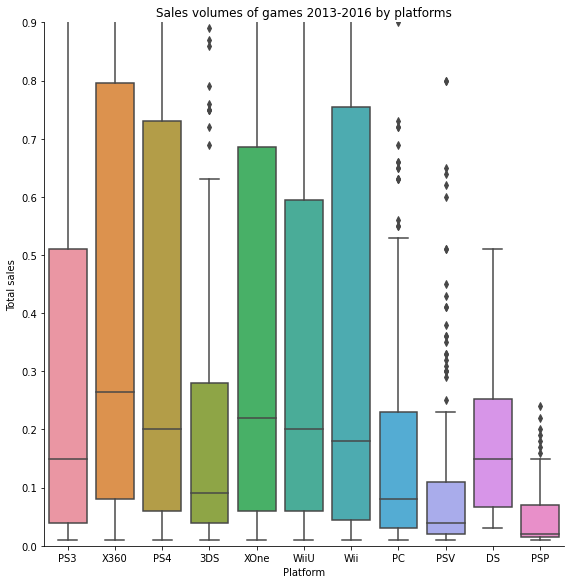

In [138]:
sns.catplot(x='platform', 
            y='total_sales', 
            kind='box', 
            data=relev_games, 
            orient='v', 
            height=8)
plt.title('Sales volumes of games 2013-2016 by platforms')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.ylim(0, 0.9)

In general, the sales volume of games by platforms does not exceed 0.8 million copies, on average sales are within 0.05 - 0.3 million copies.

In [139]:
sales_rating_2013 = relev_games.query('year_of_release == 2013').pivot_table(index='platform', 
                                                                             values='total_sales', 
                                                                             aggfunc='sum'
                                                                             ).sort_values(by='total_sales', ascending=False).head()
sales_rating_2013

,total_sales
platform,
PS3,113.25
X360,88.58
3DS,56.57
PS4,25.99
WiiU,21.65


In [140]:
sales_rating_2013.describe() 

,total_sales
count,5.00
mean,61.21
std,39.64
min,21.65
25%,25.99
50%,56.57
75%,88.58
max,113.25


In [141]:
sales_rating_2013_2016 = relev_games.query('year_of_release >= 2013').pivot_table(index='platform', 
                                                                                  values='total_sales', 
                                                                                  aggfunc='sum'
                                                                                  ).sort_values(by='total_sales', ascending=False).head()
sales_rating_2013_2016

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


In [142]:
sales_rating_2013_2016.describe()

,total_sales
count,5.00
mean,186.99
std,73.14
min,136.80
25%,143.25
50%,159.32
75%,181.43
max,314.14


In [143]:
sales_rating_2016 = relev_games.query('year_of_release >= 2016').pivot_table(index='platform', 
                                                                             values='total_sales', 
                                                                             aggfunc='sum'
                                                                             ).sort_values(by='total_sales', ascending=False).head()
sales_rating_2016

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60


In [144]:
sales_rating_2016.describe()

,total_sales
count,5.00
mean,24.08
std,26.73
min,4.60
25%,5.25
50%,15.14
75%,26.15
max,69.25


Conclusion: 

As we can see in the period from 2013 - 2016, the most profitable platforms are PS4, X360, PS3, XOne, 3DS. From the graphs we can see that the peak of game sales by platforms, on average, falls in the middle of the platform's life, which is logical based on the concept of the product life cycle. There is also a general trend of decreasing sales volume, and by the end of 2016 we see different platforms of the next generation in the sales leaders - PS4, XOne, 3DS. The average sales in the period 2013 - 2016, mainly by the median, amount to 159.32 million copies per year. This speaks of a decline in the market - the average level at the beginning and at the end of the period in 2013 was 56.57 million copies, and in 2016 only 15.14 million games. We see a drop in the market by 3.7 times. Is this a crash for the industry? No. It only indirectly speaks of redistribution and rather the industry's strategy is changing from selling cheaper and in volume to selling more expensive but of better quality.

### Let's study the influence of factors on game sales.

Let's look at the top 5 popular platforms from 2013 to 2016.

In [145]:
sales_rating_2013_2016

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


As we can see, during the period from 2013 to 2016, the most popular platform was PS4.

In [146]:
games.query('platform == "PS4"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    int64  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     392 non-null    float64
 9   user_score       392 non-null    float64
 10  rating           392 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 39.8+ KB


I removed the rating caps to not limit the amount of data for analysis.

Let's look at the influence of parameters for the PS4 platform and build a heat map.

Text(0.5, 1.0, 'he heat map of the dependence of all parameters of the dataframe for PS4')

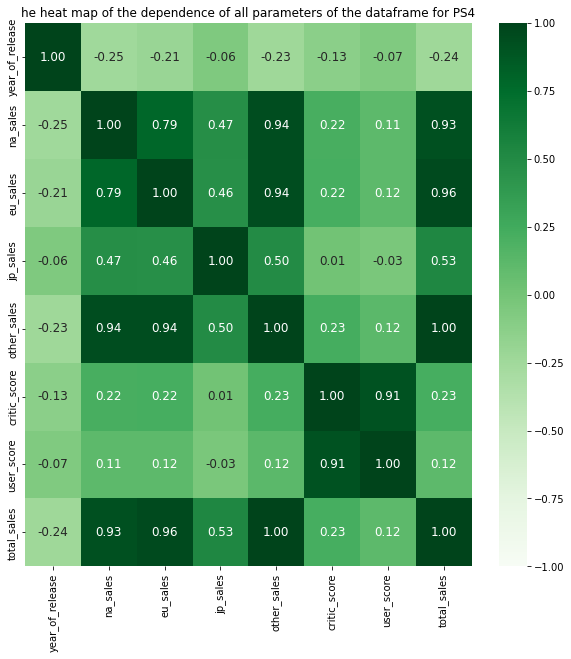

In [147]:
games_ps4 = relev_games.query('platform == "PS4"').reset_index(drop=True)
plt.figure(figsize=(10,10))
sns.heatmap(games_ps4.corr(), 
            annot=True, 
            cmap='Greens', 
            fmt='.2f', 
            annot_kws={'size':12}, 
            vmin=-1, 
            vmax=1, 
            center=0)
plt.title('he heat map of the dependence of all parameters of the dataframe for PS4')

Let's look at the dependence of critics' and users' ratings on game sales more closely and build scatter diagrams.

Correlation: 0.2265


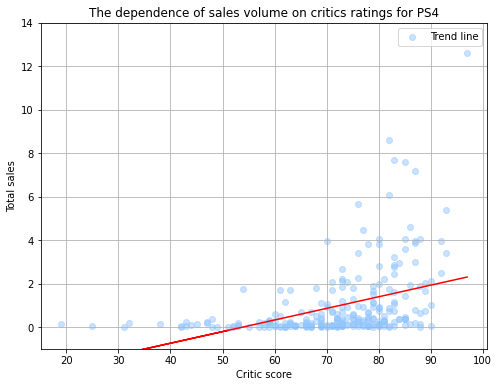

In [148]:
print('Correlation:',round(games_ps4['critic_score'].corr(games_ps4['total_sales']), 4))
x = games_ps4.query('critic_score >= 0')['critic_score']
y = games_ps4.query('critic_score >= 0')['total_sales']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('The dependence of sales volume on critics ratings for PS4')
plt.ylabel('Total sales')
plt.xlabel('Critic score')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.ylim(-1, 14)
plt.legend(['Trend line'])
plt.show()

Correlation: 0.116


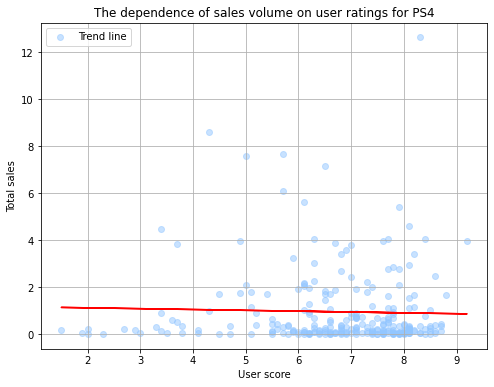

In [149]:
print('Correlation:',round(games_ps4['user_score'].corr(games_ps4['total_sales']), 4))
x2 = games_ps4.query('user_score >= 0')['user_score']
y2 = games_ps4.query('user_score >= 0')['total_sales']
plt.figure(figsize=(8, 6))
plt.scatter(x2, y2, alpha=0.5)
plt.title('The dependence of sales volume on user ratings for PS4')
plt.ylabel('Total sales')
plt.xlabel('User score')
plt.grid(True)
z = np.polyfit(x2, y2, 1)
p = np.poly1d(z)
plt.plot(x2,p(x2),'r')
#plt.ylim(-1, 14)
plt.legend(['Trend line'])
plt.show()

Conclusion: 

We can see the dependence of game sales both on critics' ratings and user ratings - weak. From the graphs, we can see that, unfortunately, user ratings have a lesser influence on sales - 0.116 compared to 0.2265. In both cases, with increasing ratings, sales increase, but I would rely on these indicators only as a last resort.

Соотнесем выводы по зависимости продаж игр от оценок критиков и пользователей по ТОП-5 наимолее популярных платформ в период 2013 - 2016.

Let's compare the conclusions on the dependence of game sales on critics' and users' ratings for the top 5 most popular platforms from 2013 to 2016.

In [150]:
sales_rating_2013_2016

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


In [151]:
top_5_platform_relev_games = relev_games.query('platform == ["PS4", "PS3", "XOne", "3DS", "X360"]')

Correlation: 0.2274


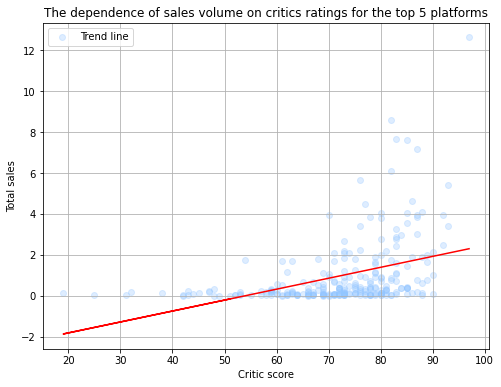

In [183]:
print('Correlation:',round(top_5_platform_relev_games['critic_score'].corr(top_5_platform_relev_games['total_sales']), 4))
x2 = top_5_platform_relev_games.query('critic_score >= 0')['critic_score']
y2 = top_5_platform_relev_games.query('critic_score >= 0')['total_sales']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.3)
plt.title('The dependence of sales volume on critics ratings for the top 5 platforms')
plt.ylabel('Total sales')
plt.xlabel('Critic score')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Trend line'])
plt.show()

Correlation: 0.1351


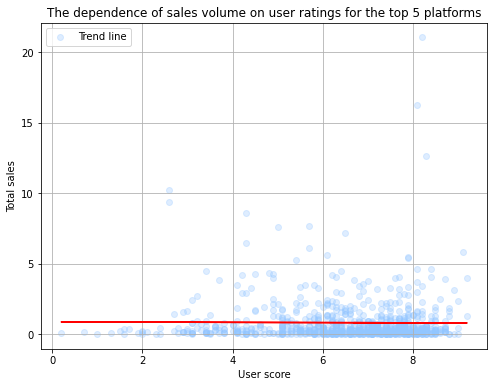

In [153]:
print('Correlation:',round(top_5_platform_relev_games['user_score'].corr(top_5_platform_relev_games['total_sales']), 4))
x2 = top_5_platform_relev_games.query('user_score >= 0')['user_score']
y2 = top_5_platform_relev_games.query('user_score >= 0')['total_sales']
plt.figure(figsize=(8, 6))
plt.scatter(x2, y2, alpha=0.3)
plt.title('The dependence of sales volume on user ratings for the top 5 platforms')
plt.ylabel('Total sales')
plt.xlabel('User score')
plt.grid(True)
z = np.polyfit(x2, y2, 1)
p = np.poly1d(z)
plt.plot(x2,p(x2),'r')
plt.legend(['Trend line'])
plt.show()

Let's build scatter diagrams.

(0.0, 1.0)

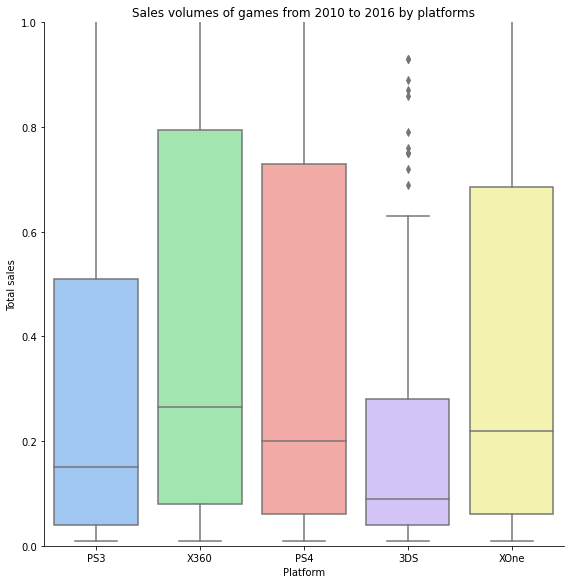

In [154]:
sns.catplot(x='platform', 
            y='total_sales', 
            kind='box', 
            data=top_5_platform_relev_games, 
            orient='v', 
            height=8)
plt.title('Sales volumes of games from 2010 to 2016 by platforms')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.ylim(0, 1)

In [155]:
pivot_stat = top_5_platform_relev_games.pivot_table(index='platform', 
                                                    values='total_sales', 
                                                    aggfunc='median'
                                                    ).sort_values(by='total_sales', ascending=False)
pivot_stat

,total_sales
platform,
X360,0.27
XOne,0.22
PS4,0.20
PS3,0.15
3DS,0.09


Conclusion: 

For the top platforms (PS3, X360, PS4, XOne, 3DS) we see a similar dependence of critics' ratings and users' ratings, critics' ratings are more significant for sales than users' ratings, also we see that the main sales are in the range of 0.1 - 0.8 million copies, but the average sales are 0.1 - 0.3 million copies. Also we can see that in terms of average sales X-box is still leading, followed by PlayStation. At the same time, in the period 2013 - 2016, the average sales are led by the platform of the previous generation X360, then XOne. The situation is opposite for PlayStation - the new generation leads in sales over the previous one. In my opinion, when forecasting sales for the next 2017 year, emphasis should be placed on the new generation and on PS4 and XOne.

From the scatter diagrams we see that for the TOP platforms PS3, X360, PS4, XOne, 3DS we see that mainly critics' ratings are important, but they have a weak influence on sales volumes and ratings from 60 - 80 points form sales up to 2 million copies, and ratings from 4 - 9 points form sales up to 2 million copies.

From the graphs we see that when forecasting for future periods, relying on user reviews is not worth it as the influence is very weak, but relying on critics' opinions should be the last resort.

### Let's study the distribution of games by genre.

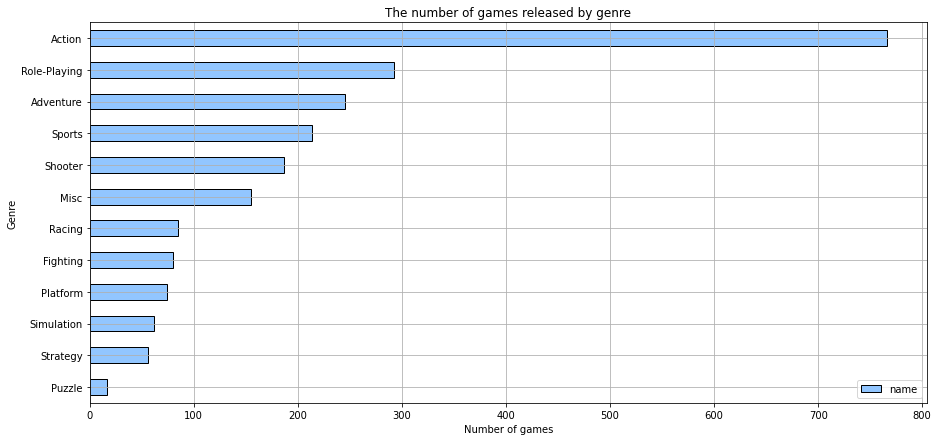

In [156]:
genre_sum_games = relev_games.pivot_table(index='genre', 
                                          values='name', 
                                          aggfunc='count'
                                          ).sort_values(by='name')

plt.style.use('seaborn-pastel')
genre_sum_games.plot(kind='barh', 
                     ec='black',
                     figsize = (15,7))
plt.title('The number of games released by genre')
plt.ylabel('Genre')
plt.xlabel('Number of games')
plt.grid(True)
plt.show()

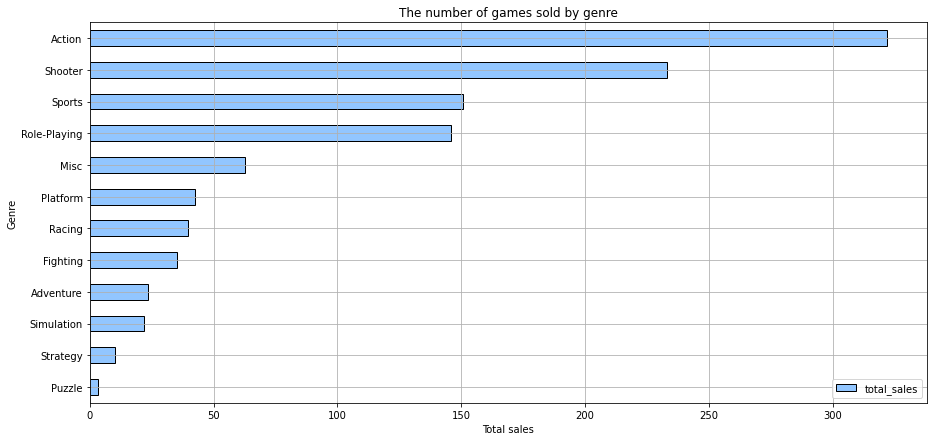

In [157]:
genre_sum_games = relev_games.pivot_table(index='genre', 
                                          values='total_sales', 
                                          aggfunc='sum'
                                          ).sort_values(by='total_sales')

plt.style.use('seaborn-pastel')
genre_sum_games.plot(kind='barh', 
                     ec='black',
                     figsize = (15,7))
plt.title('The number of games sold by genre')
plt.ylabel('Genre')
plt.xlabel('Total sales')
plt.grid(True)
plt.show()

In [158]:
genre_sum_games.describe()

,total_sales
count,12.00
mean,90.89
std,101.12
min,3.17
25%,23.17
50%,41.26
75%,147.08
max,321.87


We will build a range diagram of game sales by genre.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Shooter'),
  Text(2, 0, 'Role-Playing'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Fighting'),
  Text(6, 0, 'Simulation'),
  Text(7, 0, 'Racing'),
  Text(8, 0, 'Platform'),
  Text(9, 0, 'Adventure'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Strategy')])

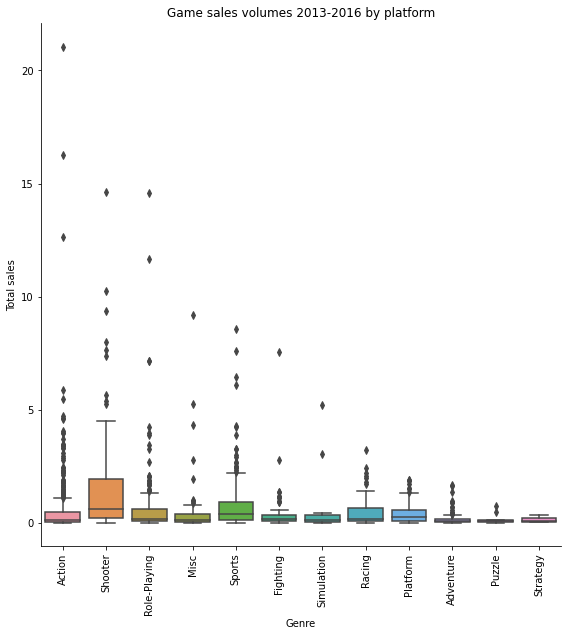

In [159]:
sns.catplot(x='genre', 
            y='total_sales', 
            kind='box', 
            data=top_5_platform_relev_games, 
            orient='v', 
            height=8)
plt.title('Game sales volumes 2013-2016 by platform')
plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.xticks(rotation=90)
#plt.ylim(0, 2)

Let's take a closer look.

(0.0, 2.0)

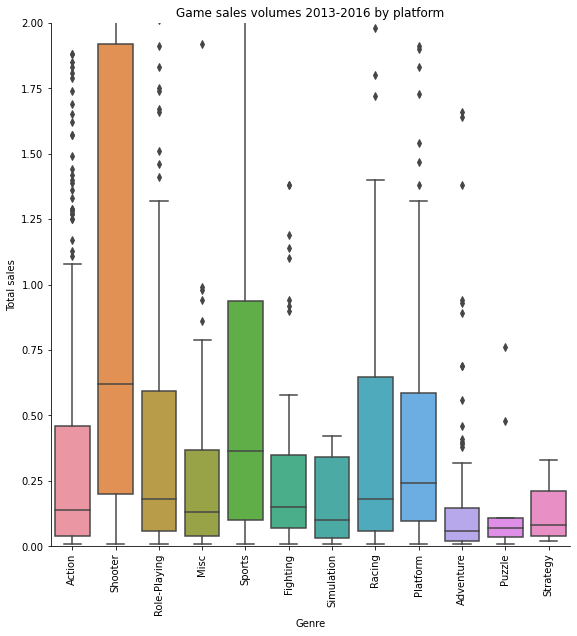

In [160]:
sns.catplot(x='genre', 
            y='total_sales', 
            kind='box', 
            data=top_5_platform_relev_games, 
            orient='v', 
            height=8)
plt.title('Game sales volumes 2013-2016 by platform')
plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.xticks(rotation=90)
plt.ylim(0, 2)

We see that action is not as voluminous in terms of average sales and mostly sells no more than 0.18 million copies, with the average sales led by genres such as shooter, platform, and sport.

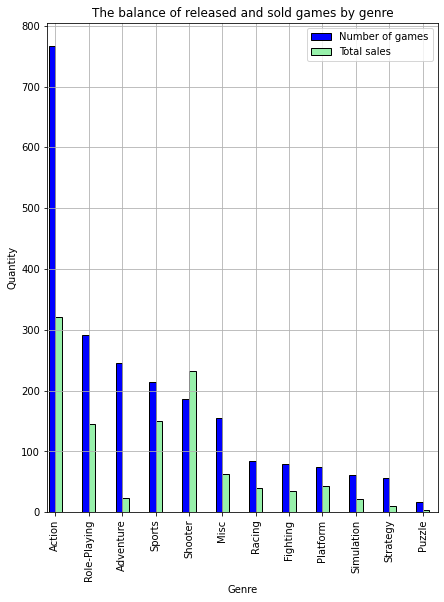

In [161]:
ax = plt.gca()

pivot = relev_games.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', 
           figsize=(7,8), 
           ec='black', 
           ax=ax, 
           width=0.2, 
           color='b', 
           position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', 
           figsize=(7,9), 
           ec='black', 
           ax=ax, 
           width=0.2, 
           color='#97F0AA', 
           position=0)

ax.legend(['Number of games', 'Total sales'])

plt.title('The balance of released and sold games by genre')
plt.ylabel('Quantity')
plt.xlabel('Genre')
plt.grid(True)
plt.show()

From the data, we see that the stars of this rating are games that bring sales mainly within the range of 25-150 million sold games, excluding action and shooter games. In this range, the following genres are: fighting, racing, platformer, misc, role-playing, sport, and by focusing on them, one can get a stable demand.

Conclusion: 

It is not correct to talk about profitability in our case, as the data frame only gives us the sales volumes in terms of the number of copies sold without specifying the prices. If we assume that the prices are equal, then the most profitable genres are action and shooter. This assumption is economically and financially incorrect in the considered period of time, as these genres require large budget injections for production. For further sustainable economic development, it is advisable to consider more stable genres for purchase. We can see an interesting dependence here: developers released a sufficient number of adventure games, but in terms of sales they are in third to last place. 

Based on the balance graph of sold and released games by genre, we can distinguish three groups: the most balanced (sold more than 50% of the released), genres: sport, shooter, platformer; balanced (sold 30-50%), genres: action, role-playing, misc, racing, fighting, simulation; and unbalanced (sold less than 30%), genres: adventure, strategy, puzzle. 

In the forecast for 2017, we can mainly focus on the more balanced genres, and then on the balanced ones.

## 4. User portrait.

### Let's determine the popular platforms in sales regions.

In [162]:
def top_in_regions_plot(groupby, region_sales, ax, ylim):
    pivot = relev_games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'b', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', 
                      ec='black', 
                      title=title_dict[region_sales], 
                      ax=axes[ax], 
                      fontsize=18, 
                      color=color_dict[region_sales], 
                      rot=90, 
                      ylim=ylim)
    plot.legend(prop={'size':12})
    
    plot.set_ylabel('Total sales')
    plot.title.set_size(20)

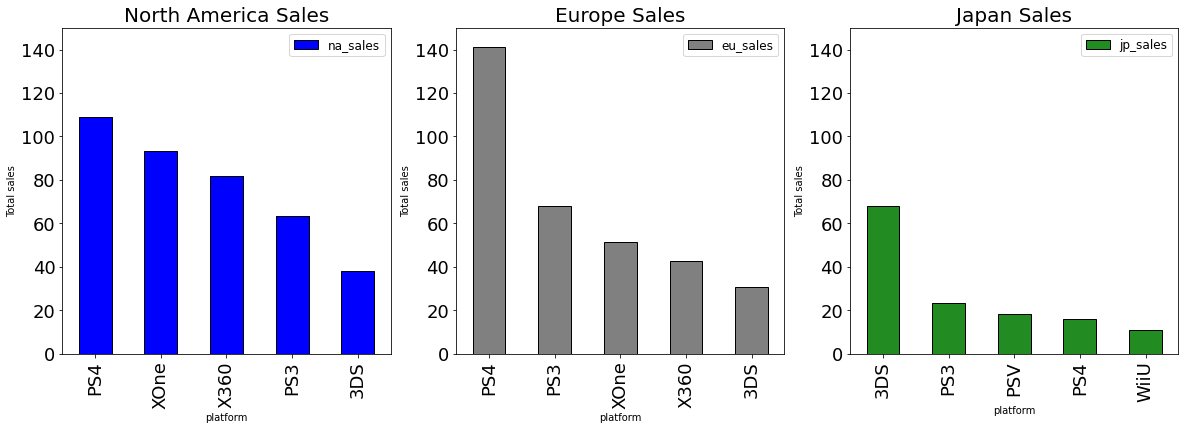

In [163]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top_in_regions_plot('platform', 'na_sales', 0, (0,150))
top_in_regions_plot('platform', 'eu_sales', 1, (0,150))
top_in_regions_plot('platform', 'jp_sales', 2, (0,150))

Conclusion: 

We can see that the regions differ in sales and the highest number of sales in North America is with the most popular platforms PS4, XOne and X360. Next in terms of sales volume is Europe with the most popular platforms PS4, PS3 and XOne. Japan follows with the most popular platform 3DS and PS3. 

As can be seen from the distribution, the distribution of platforms in America and Europe is similar, but in Europe trends change slower and users switch to new platforms. The picture of distribution in Japan is different from the West.

### Let's determine the popular genres in sales regions.

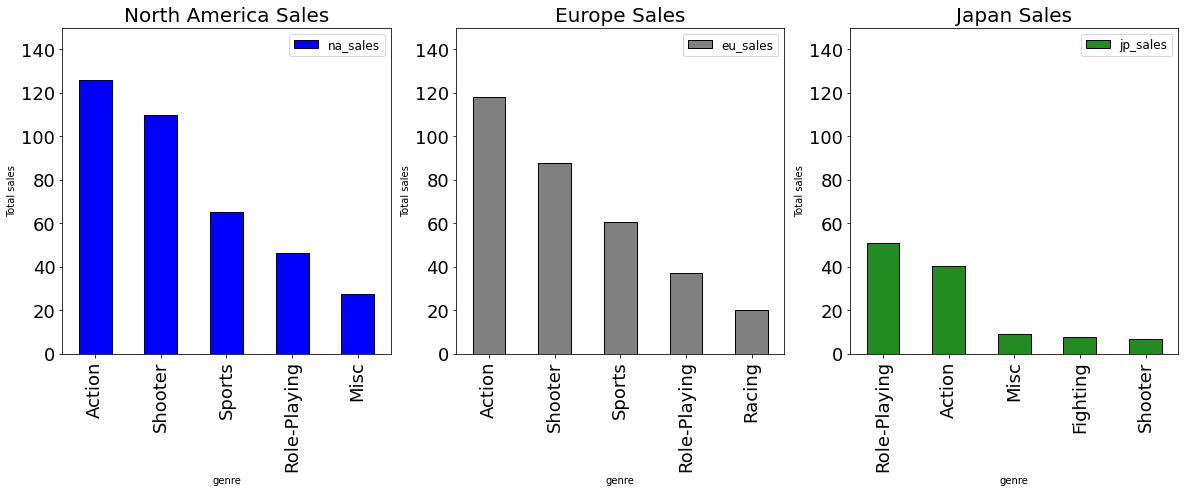

In [164]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top_in_regions_plot('genre', 'na_sales', 0, (0,150))
top_in_regions_plot('genre', 'eu_sales', 1, (0,150))
top_in_regions_plot('genre', 'jp_sales', 2, (0,150))

Conclusion: 

We can see that the most popular in North America and Europe are games in the genres of action, shooter and sports, while in Japan role-playing and action are the most popular.

### Let's consider the influence of the ESRB rating on game sales in a particular region.

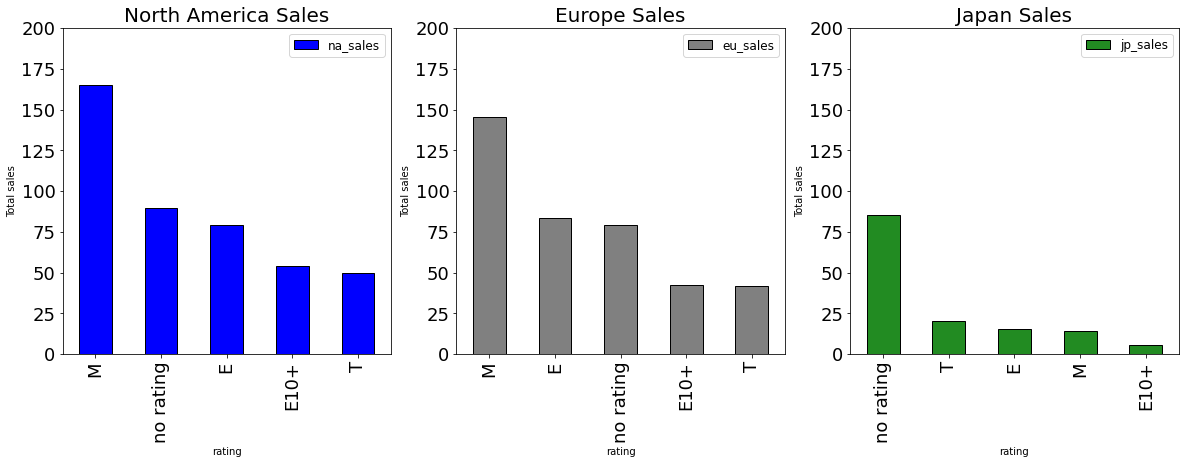

In [165]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top_in_regions_plot('rating', 'na_sales', 0, (0,200))
top_in_regions_plot('rating', 'eu_sales', 1, (0,200))
top_in_regions_plot('rating', 'jp_sales', 2, (0,200))

Initially, we can see that the top 5 sales in all regions include values of no rating, while the ESRB rating system is intended for marking games in the US and Canada. This explains the presence of unrated games in Europe and Japan, but in the dataset, in my opinion, there are anomalous data that include no rating and sales in the US territory. These values make up 629 rows or 3.83%.

We will build pie charts of game sales by rating based on the region.

In [166]:
def top_in_regions_plot_pie(groupby, region_sales, ax, y):
    pivot = relev_games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'b', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='pie', 
                      autopct='%1.0f%%', 
                      title=title_dict[region_sales], 
                      ax=axes[ax], 
                      fontsize=12, 
                      y=y)
    plot.legend(prop={'size':12})
    
    plot.set_ylabel('The share of games sold by rating')
    plot.title.set_size(20)

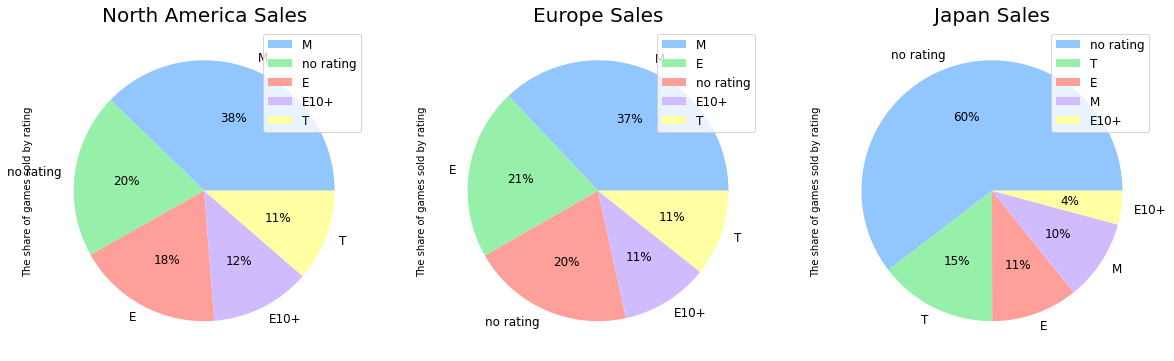

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top_in_regions_plot_pie('rating', 'na_sales', 0, 'na_sales')
top_in_regions_plot_pie('rating', 'eu_sales', 1, 'eu_sales')
top_in_regions_plot_pie('rating', 'jp_sales', 2, 'jp_sales')

The ESRB rating includes: 
* "EC" ("Early Childhood"): The game is suitable for children aged 3 and up; 
* "E" ("Everyone"): The content is suitable for ages 6 and up; 
* "E10+" ("Everyone 10 and Older"); 
* "T" ("Teen"): The game is suitable for those aged 13 and up; 
* "M" ("Mature"): The game's content is not suitable for those under 17; 
* "AO" ("Adults Only 18+"): The game's content is only suitable for adults aged 18 and up; 
* "RP" ("Rating Pending"): The product has been sent to the ESRB and is awaiting a rating. This logo is only used on promotional presentations and demo versions of games prior to the official release date.

Conclusion: 

From the pie charts, we can see the influence of rating on game sales in each region. In America and Europe, sales depend on rating by 80%, while in Japan we see the dependence of sales on rating only by 40%. As previously mentioned, the regional limitation of the ESRB system is confirmed by the graphics. Since America is the main consumer of content and also sets the trend, Europe fully supports it, and Japan only by 40%. From the data, an excellent picture of the Japanese market is formed, since the ESRB rating system does not affect most games, the priority of game sales is given to 3DS, and consumers prefer games in the genres of role-playing and action.

As the main sales region, emphasis should be placed on North America and Europe, attention should be focused on consumers, which are children and teenagers aged 6-17, with an emphasis on games in the genres of action, shooter, sport, misc and role-playing.

## 5. Testing hypotheses.

Hypothesis 1: The average user ratings of the Xbox One and PC platforms are the same.

Null Hypothesis H₀:
* The average user ratings of the Xbox One and PC platforms are the same.

Alternative Hypothesis H₁:
* The average user ratings of the Xbox One and PC platforms are different.

The threshold value α=1% is the standard level, as we have a lot of missing data, there is a risk of incorrectly rejecting the hypothesis.

In [168]:
xone = relev_games.query('(platform == "XOne") and (user_score >=0)')['user_score']
pc = relev_games.query('(platform == "PC") and (user_score >=0)')['user_score']

Dispersion

In [169]:
print(round(np.var(xone,ddof=1), 4))
print(round(np.var(pc,ddof=1), 4))

1.907
3.0359


Median

In [170]:
print(xone.median())
print(pc.median())

6.8
6.8


Averege

In [171]:
print(round(xone.mean(), 2))
print(round(pc.mean(), 2))

6.52
6.27


In [172]:
alpha = 0.01
results = st.ttest_ind(xone, pc, equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We were unable to reject the null hypothesis')

p-value: 0.14759594013430463
We were unable to reject the null hypothesis


Hypothesis 2: The average user ratings of the Action (English: "action") and Sports (English: "sports competitions") genres are different.

Null Hypothesis H₀:
* The average user ratings of the Action (English: "action") and Sports (English: "sports") genres are the same.

Alternative Hypothesis H₁:
* The average user ratings of the Action (English: "action") and Sports (English: "sports") genres are different.

The threshold value α=1% is the standard level, as we have a lot of missing data, there is a risk of incorrectly rejecting the hypothesis.

In [173]:
action = relev_games.query('(genre == "Action") and (user_score >=0)')['user_score']
sports = relev_games.query('(genre == "Sports") and (user_score >=0)')['user_score']

Dispersion

In [174]:
print(round(np.var(action,ddof=1), 4))
print(round(np.var(sports,ddof=1), 4))

1.7694
3.1806


Median

In [175]:
print(action.median())
print(sports.median())

7.1
5.5


Averege

In [176]:
print(round(action.mean(), 2))
print(round(sports.mean(), 2))

6.84
5.24


In [177]:
alpha = 0.01
results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We were unable to reject the null hypothesis')

p-value: 1.4460039700704315e-20
We reject the null hypothesis


Conclusion: 

During the hypothesis testing, the following results were obtained, that the average user ratings of the Xbox One and PC platforms are the same (or very close), and that the average user ratings of the action and sports genres are different.

## 6. Overall conclusion.

From the preliminary data review and their subsequent preparation, we see the following:
* In the column names there were symbols in upper case - the column names have been brought to lower case.
* In the Year_of_Release column the data was in float format - the data has been brought to int format.
* Missing data in the columns: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating and on average 12.14% of data was missing - the missing data in the year_of_release, name and genre columns were removed, and in the other columns replaced with the atypical value -1 or no rating, as it does not seem reasonable to fill them with meaningful and logical data.
* Duplicates were not detected.
* Errors and anomalies in categorical data were not detected.
* In the User_Score column the data was in object format and there were data tbd which are NaN - the categorical data was replaced with NaN and then with the atypical value -1.
* In the Rating column there was the category K-A which does not belong to the ESRB system, * K-A corresponds to the E category from the ESRB system - the rating structure has been brought to the current ESRB system.

During the analysis of the distribution of the number of released and sold games over the time period of the data set from 1980 to 2016, we see that until 1994 the number of released games was very low. Starting from 1994, there is a gradual increase in the number of released games. This growth is associated with the development of electronics - the appearance of Pentium processors in 1993, the development of software - the release of Windows 3.1 in 1993 and the release of the first game console PlayStation in 1994. At the same time, in the period from 1998 to 2000, we see that the gaming industry reaches a plateau with an increase in the number of released games from 2001, which is associated with the release of PlayStation 2 in 2000 and Xbox in 2000. The development of new gaming platforms allows us to reach the peak of game releases in the period up to 2009 and, due to the development of mobile technologies Android, iOS + social networks, the number of released games is steadily decreasing from year to year and from 2012 to 2016 it reaches a plateau comparable to the volume of 2001. The graph of game sales shows a similar picture of active growth in sales from 1994-1995 to 2008, followed by a decrease in sales volumes.

When considering the distribution of the number of released and sold games, we see that the most popular platform over the entire time period in the data set is the well-known PlayStation 2, followed by X360, PS3, Wii, DS and PS, and in terms of the number of released games, the leaders are PS2 and DS, then PS3, Wii, X360, PSP, PS. Sales data for games, unlike the number of released games, indirectly show us the popularity of a particular platform from a technical point of view, as well as from the point of view of the quality of the games released for it.

Examining the average lifespan of a platform, we see that on average it is 11 years, but progress is relentless and we are confidently moving towards perfection. For predictive data analysis, a period equal to the average lifespan is not suitable as during the analysis, data from already archived platforms will be captured. For further analysis, the period 2013-2016 was chosen. Examining game sales with the specified period, we see that the volume of game sales on platforms does not exceed 0.8 million copies, on average sales are within 0.05-0.3 million copies. During the period 2013-2016, the most profitable platforms were X360, PS3, Wii, DS, and from the graphs we see that the peak of game sales on platforms, on average, falls in the middle of the platform's lifespan, which is logical based on the marketing concept of the product life cycle. There is also a general trend of decreasing sales, and by the end of 2016 we see different platforms of the next generation, PS4, XOne, 3DS, in the sales leaders. The average sales in the period 2013-2016, mainly by the median, are 159.32 million copies per year, while the average level at the beginning and end of the period in 2013 was 56.57 million copies, and in 2016 only 15.14 million games. We see a market decline of 3.7 times. Is this a crash for the industry? No, it only indirectly speaks of redistribution and rather the industry's strategy is changing from selling cheaper and in volume to selling more expensive but of better quality. 

Examining the influence of critics' and users' ratings on the volume of game sales, we see a dependence of the volume of game sales both on the critics' rating and on the users' rating. From the graphs, it is seen that, unfortunately, the users' rating affects the sales to a lesser extent than the critics' rating. In both cases, but with different intensity, sales increase with the increase in rating. 

We can see a similar correlation between critic ratings and user ratings for the top platforms (PS3, X360, PS4, XOne, 3DS), with critic ratings being more significant for sales than user ratings. We also see that the main sales range from 0.1 to 0.8 million copies, but the average sales range from 0.1 to 0.3 million copies. We also see that overall, X-box leads in average sales, followed by PlayStation. During the period 2013-2016, the average sales leader was the previous generation platform X360, followed by XOne. For PlayStation, the situation is reversed, with the new generation leading in sales over the previous one. In my opinion, when forecasting sales for the next year 2017, the emphasis should be on the new generation and on PS4 and XOne.

From the scatter diagrams, we can see that for the top platforms PS3, X360, PS4, XOne, 3DS, critic ratings are mainly important, but they have little influence on sales volumes and critic ratings of 60-80 points form sales of up to 2 million copies, while user ratings of 4-9 points form sales of up to 2 million copies.

From the graphs, we can see that when forecasting for future periods, it is not advisable to rely on user reviews as the influence is very weak, but relying on critic opinions should be the last resort.

Studying the distribution of the number of released and sold games by genre, it is incorrect to speak of profitability in our case, as the data frame only gives us the volumes of sales in the number of copies sold without specifying the prices. If we assume that the prices are equal, then the most profitable genres are action and shooter. This assumption in the considered period of time from the point of view of economics and finance is wrong, as these genres require large budget injections for production. For further sustainable economic development, it is advisable to consider more stable genres of games for purchase. We see an interesting dependence: developers released a sufficient number of adventure games, but in terms of sales they are in 3rd place from the end.

Based on the balance graph of sold and released games by genre, we can distinguish groups - the most balanced (sold more than 50% of the released), genres: sport, shooter, platformer; balanced (sold 30 - 50%), genres: action, role-playing, misc, racing, fighting, simulation; unbalanced (sold less than 30% of the released), genres: adventure, strategy, puzzle.

In the forecast for 2017, we can mainly focus on more balanced genres, and then on balanced ones.

Composing a customer portrait for the period 2013-2016, we see that the main consumer is located in North America and Europe, belonging to the age group of 6-17 years old, mainly playing on PS4, XOne and X360, but not forgetting PS3. The consumer mainly entertains himself with action, shooter, playing and sports games. When considering Japan, the preference in platform (3DS and PS3) and genre (role-playing and action) changes.

As seen from the platform distribution picture in America and Europe, the distribution is similar, but in Europe trends change slower and users switch to new platforms. The picture of distribution in Japan is different from the West.

During the hypothesis testing, the following results were obtained: the average user ratings are not the same, and the average user ratings of action and sport genres are the same.

#### Based on the above, emphasis and focus should be placed on advertising for the upcoming year (2017) as follows:
* #### Platform: 
Emphasis should be placed on PS4 and XOne as the leaders of the 2013-2016 period were PS3 and X360, but these are previous-generation platforms and in 2016 PS4 and XOne are actively gaining both popularity and sales.
* #### Region: 
Emphasis should be placed on the US as the main consumer of content, but Europe should not be forgotten either, as data shows that Europe follows most American trends, but in a smaller volume.
* #### Consumer: 
The main consumer of content, regardless of region, is children and teenagers aged 6-17.
* #### Genre: 
Emphasis should be placed on the following groups: most balanced (sold more than 50% of released), genres: sport, shooter, platformer; moderately balanced (sold 30-50%), genres: action, role-playing, misc, racing, fighting, simulation; least balanced (sold less than 30%), genres: adventure, strategy, puzzle.
* #### ESRB rating system: 
The ESRB rating system does not have a significant impact on sales volumes in America and Europe, as only 80% of games have a rating, and in Japan only 40%.
* #### Critic and user reviews: 
An analysis of the dependence of sales on ratings from both critics and users revealed a weak dependence (correlation coefficient 0.1352 for user reviews versus 0.2274 for critic reviews) both on one platform and when considering the TOP-5 platforms 2013-2016. Relying on user reviews should not be done as the influence is very weak, but relying on critic reviews should be done last.